In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from scipy.signal import get_window
from smstools.models import utilFunctions as UF
from smstools.models import stft as STFT

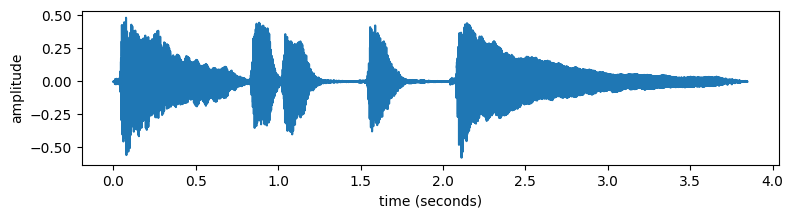

In [2]:
inputFile = '../sounds/piano.wav'
fs, x = UF.wavread(inputFile)
plt.figure(0, figsize=(9, 2))
time_indexes = np.linspace(0, x.size/fs, x.size)
plt.plot(time_indexes, x)
plt.xlabel('time (seconds)')
plt.ylabel('amplitude')
plt.show()
ipd.display(ipd.Audio(data=x, rate=fs))

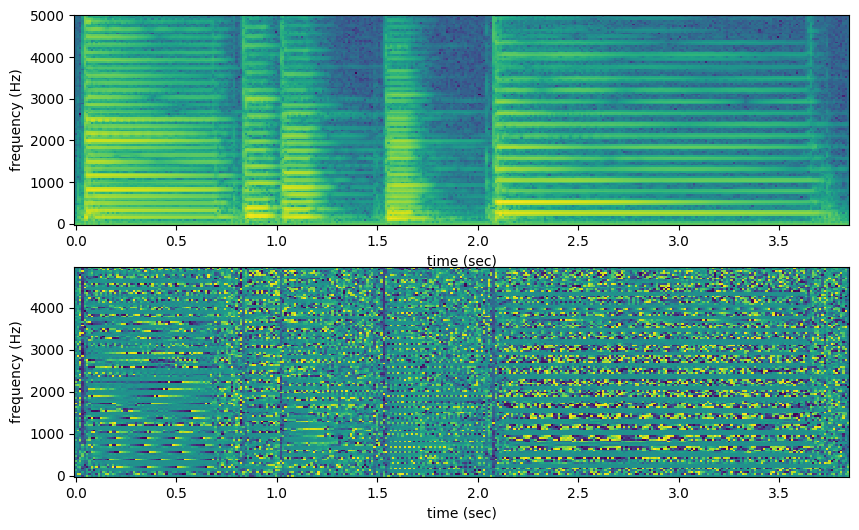

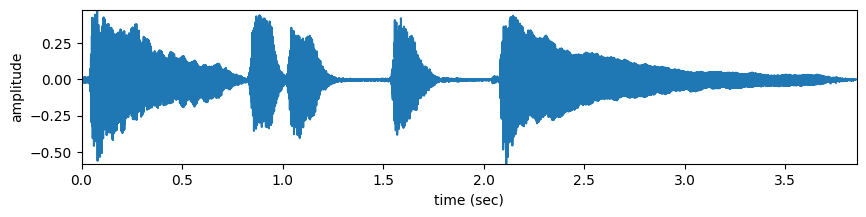

In [3]:
window = 'hamming'
M = 1024
N = 1024
H = 512

w = get_window(window, M)
mX, pX = STFT.stftAnal(x, w, N, H)
y = STFT.stftSynth(mX, pX, M, H)

plt.figure(figsize=(10, 6))
maxplotfreq = 5000.0
plt.subplot(2, 1, 1)
numFrames = int(mX[:, 0].size)
frmTime = H * np.arange(numFrames) / float(fs)
binFreq = fs * np.arange(N * maxplotfreq / fs) / N
plt.pcolormesh(frmTime, binFreq, np.transpose(mX[:, : int(N * maxplotfreq / fs + 1)]))
plt.xlabel("time (sec)")
plt.ylabel("frequency (Hz)")
plt.autoscale(tight=True)
plt.subplot(2, 1, 2)
numFrames = int(pX[:, 0].size)
frmTime = H * np.arange(numFrames) / float(fs)
binFreq = fs * np.arange(N * maxplotfreq // fs) // N
plt.pcolormesh(frmTime, binFreq, np.transpose(np.diff(pX[:, : int(N * maxplotfreq / fs + 1)], axis=1)))
plt.xlabel("time (sec)")
plt.ylabel("frequency (Hz)")
plt.autoscale(tight=True)
plt.show()

plt.figure(figsize=(10, 2))
plt.plot(np.arange(y.size) / float(fs), y)
plt.axis([0, y.size / float(fs), min(y), max(y)])
plt.ylabel("amplitude")
plt.xlabel("time (sec)")
plt.show()

ipd.display(ipd.Audio(data=y, rate=fs))
